Pandas is a Python library for handling structured data (e.g., csv files) that comes with statistical tools, convenient data importing functions and tools to filter and extract data. Its key data structure is called the "DataFrame". This allows you to store and manipulate tabular data, similar to an Excel sheet. It behaves in some ways like a generalization of dictionaries to associate more than 2 objects.

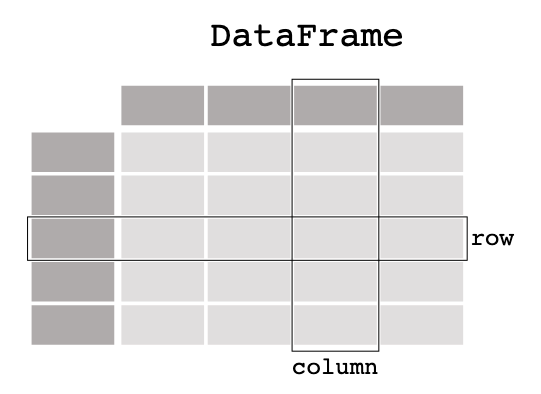

Unlike a NumPy array, a Dataframe can contain multiple data types, such as numbers and text, but the data in each column must be of the same type. 

A DataFrame can be read from different data sources, such as CSV files or Excel files (using the read_csv() function), or created from scratch. For example, to create a dataset containing information about chemical compounds, such as molecular weights, boiling points, and solubilities: 

In [ ]:
import pandas as pd

data = {
    'Compound': ['Water', 'Ethanol', 'Benzene', 'Methanol', 'Acetone', 'Toluene', 'Tetrachloroethylene'],
    'MolecularWeight': [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    'BoilingPoint': [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    'Solubility': ['Infinite', 'Miscible', '0.178 g/100 mL', 'Miscible', 'Miscible', 'None', '206 mg/L']
}

df = pd.DataFrame(data)

To  view the first 5 rows and access the names of the columns: 

In [ ]:
df.head(5)

In [ ]:
df.columns

To print summary statistics for each column in the DataFrame, use describe(): 

In [ ]:
df.describe()

To get the unique values in a column

In [ ]:
unique_values = df['Solubility'].unique()
unique_values

You can access a specific column by using indexing with the column name:

In [ ]:
MW = df['MolecularWeight']
MW

Or by a vertical (column) slicing:

In [ ]:
df.loc[:, 'MolecularWeight']

Similarly, rows can be accessed by doing a horizontal (row) slicing df['rowname', :]. You can also locate a specific cell using the loc() method: 

In [ ]:
df.loc[2, 'MolecularWeight'] #'2' for the row number

You can add new columns to existing DataFrames. For example, to convert the boiling points from Celsius to Fahrenheit and add this as a new column: 

In [ ]:
df['BoilingPoint (°F)'] = df['BoilingPoint']*1.8 + 32
df.head()

To filter the DataFrame based on a given condition, you can use boolean indexing. For example, to find and select all compounds with a molecular weight above 50 and store them into a new DataFrame:

In [ ]:
filtered_df = df[df['MolecularWeight'] > 50]
filtered_df

It is possible to sort the DataFrame, for example, based on a particular column, using sort_values(). To sort the compounds based on their molecular weights in ascending order: 

In [ ]:
sorted_df = df.sort_values('MolecularWeight', ascending=True)
sorted_df

In general, Pandas uses two types of accessing things. The first is the already used locator method ".loc". This method first tries to find the "name" of the column/row and only if it fails it will use try to use the given entry as index. The second methods is the index based locator ".iloc". This one pretty much behaves exactly as in numpy where you select a specific column/row by its index. Then there is the "lazy" version you have used above "MW = df['MolecularWeight']" in which you don't specify a locator, similar you can try to use "df.MolecularWeight" that will work if your columns have specific names without spaces.<br>
Anyhow, in the beginning it is recommended to use df.loc or df.iloc, because this makes it clear for what you going to use. each of these can be stacked. Meaning: df.loc[:,['MolecularWeight', 'BoilingPoint']] will return all rows from the two columns df.loc[:,['MolecularWeight', 'BoilingPoint']].iloc[2:4,:] adds a second localizer after that selects the third and forth row from these....<br>
While all of this has obvious usage for sorting and selecting data, the indexes offer some really neat usage if they are values instead of names. To illustrate this lets generate some data and put the x-values of it into the index. 

In [ ]:
import numpy as np
import pandas
x_values = np.arange(-10,10,0.1)  #generate an x-vector
df_function={}   # generate an empty dictionary and we will use the peak center as index
df_function['0'] = np.exp(-x_values**2)
df_function['1'] = np.exp(-(x_values-1)**2)
df_function['2'] = np.exp(-(x_values-2)**2)
df_function = pandas.DataFrame(df_function,index=x_values)

If directly created like this the index is of type float. If this is generated from other datatype one typically can convert the index into float using this command

In [ ]:
df_function.index=df_function.index.astype(float)
df_function.index.dtype

With the index as float, plotting gets very neat

### task: 

test what "df_function.plot()" returns<br>
and then give your index a name with df_function.index.name='x-values'<br>
and test again what the plot returns

In [ ]:
# enter code here

finally having either of the  indexes as numbers one can slice by value. Test what these return<br>
df_function[:-1]<br>
df_function[-1:1]<br>
df_function.loc[-1:1,:]<br>

In [ ]:
# enter code here

the really cool thing is that you do not even have to have the right numbers in your slices. show that the following slice will work just as you expect:<br>

df_function[0.01:0.2].plot()  <br>

Now write for yourself, which steps the interpretation would have to do to achieve this. The start could be:<br> 
find in the index the position of the index that is closest to 0.01 and then.... 


Using a value like this as index is also very powerful when reading data that was e.g. measured by a machine. The following code reads data from a webpage and converts it into a DataFrame. The column names are the parameter used for this function. Using slicing to plot only the measurements where the parameter is between 10 and 20. Important, you will need to sort the column index first. This is easiest done while using the option "inplace=True".

In [ ]:
df_sinc=pd.read_csv("http://www.jensuhlig.de/Kemm30/sinc.dat",index_col=0)
df_sinc.columns=df_sinc.columns.astype(float)  #convert the column entries from string to float
df_sinc.index=df_sinc.index.astype(float)      #convert the index entries from string to float
df_sinc.columns.name='Parameter'
df_sinc.plot()

In [ ]:
# enter your code here.

This reading function is very powerful and can through its many option even process very complicated files. Look at this file on the internet "http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat" That was measured at a large scale research facility. From this file we want to: <br>
ignore the first 29 row <br>
then separate the columns by as many white characters as there are using "\s+" as a separator<br>
then only read the columns named "Energy" and "PR" which we counted to be columns 2 and 14<br>
Given them the right name and use the "Energy" as index.

In [ ]:
df_aps_manual=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=30,sep='\s+',names=['Energy','PR'],index_col=0,usecols=[2,14])
df_aps_manual.plot()

With time one learns more and more of the functions offered in the reading tools and can e..g simplify the same task with:

In [ ]:
df_aps_automatic=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=29,escapechar='L',sep='\s+',index_col=0,usecols=['Energy','PR'])
df_aps_automatic.plot()

In [ ]:
### Task plot this function between 8.96 and 9.0 

Advanced aggregation. It is possible to group and aggregate data based on a specific property. This can be useful for analyzing data. The function that is used for this is called "groupby". <br>
"Groupby" takes so called categorized data, meaning data that can be placed into a group, and does something to all entries in this group. As an example: in our we could use the solubility. This solubility is clearly separated into missiple, inmissible and other values.

In [ ]:
#Group by solubility
grouped_df = df.groupby('Solubility') 
# a grouped_df is a structure that is sorted by the groups. 
# In data analysis this is also called a "pipe" = pipeline for further analysis.

#Calculate the mean molecular weight for each group
mean_mw = grouped_df['MolecularWeight'].mean()

#Calculate the maximum boiling point for each group
max_bp = grouped_df['BoilingPoint'].max()

# plot the two values vs each other as a test
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(mean_mw,max_bp,'*')

EXERCISE: Analyzing Chemical Data with Pandas

Provide the students with a CSV file named "chemical_data.csv" containing information about different chemical compounds. The dataset includes the following columns: 

CompoundName
MolecularWeight
BoilingPoint
Solubility

Use Pandas to read the chemical_data.csv file and create a DataFrame. Explore the first few rows of the DataFrame.

1) Find the compound with the highest boiling point using Pandas
2) Print the compounds with a solubility greater than 1 g/100 mL
3) Calculate the average molecular weight of the compounds and save this as a new column
4) Write the DataFrame to file using to_csv(). 

Pandas can also be combined with other libraries such as Matplotlib to visualise the data. For example, we can create a scatter plot between the molecular weight and the boiling points.

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['BoilingPoint'], df['MolecularWeight'])
plt.xlabel('Boiling Point (°C)')
plt.ylabel('Molecular Weight (g/mol)')
plt.show()

Here, we will used the cheminformatics library RDKit to calculate descriptors for a dataset containing chemical structures in the form of smiles. 

### Note!! Here you need to have installed rdkit (not included in anaconda)  (see [here](https://www.rdkit.org/docs/Install.html))

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors

#Read the dataset as SMILES string < TO BE DONE
df = pd.read_csv('smiles.csv')

def calculate_descriptor(smiles, descriptor): 
    mol = Chem.MolFromSmiles(smiles) # Load the molecule from the SMILES string
    return descriptor()

df['MolecularWeight'] = df['SMILES'].apply(lambda x: calculate_descriptor(x, Descriptors.MolWt))